In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
url = 'https://raw.githubusercontent.com/adithya6603/adithya/main/Quote-Equity-RELIANCE-EQ-13-07-2022-to-13-07-2023.csv?token=GHSAT0AAAAAACUZVVKJLQFNW3NG4VP7Q2XGZUSJHUA'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
dataset_train.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,close,VOLUME,turnover
0,13-Jul-23,"2,783.90","2,799.00","2,737.25","2,767.75","2,743.00","67,76,172",187983.5765
1,12-Jul-23,"2,766.30","2,802.00","2,761.65","2,764.70","2,767.75","86,45,662",240487.6483
2,11-Jul-23,"2,752.90","2,770.00","2,737.60","2,735.05","2,764.70","92,62,001",255199.7541
3,10-Jul-23,"2,688.90","2,756.00","2,675.00","2,633.60","2,735.05","1,53,40,262",418719.9557
4,07-Jul-23,"2,635.00","2,664.95","2,628.00","2,638.75","2,633.60","61,72,684",163291.6452


In [8]:
from sklearn.preprocessing import MinMaxScaler
training_set = np.array([float(str(x).replace(',', '')) for x in training_set.flatten()]).reshape(-1, 1)
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:


X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train.shape)
print(y_train.shape)


(188, 60, 1)
(188,)


In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 9s 99ms/step - loss: 0.1208
Epoch 2/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0497
Epoch 3/100
6/6 [==============================] - 1s 99ms/step - loss: 0.0492
Epoch 4/100
6/6 [==============================] - 1s 165ms/step - loss: 0.0358
Epoch 5/100
6/6 [==============================] - 1s 164ms/step - loss: 0.0340
Epoch 6/100
6/6 [==============================] - 1s 96ms/step - loss: 0.0315
Epoch 7/100
6/6 [==============================] - 1s 99ms/step - loss: 0.0315
Epoch 8/100
6/6 [==============================] - 1s 98ms/step - loss: 0.0279
Epoch 9/100
6/6 [==============================] - 1s 98ms/step - loss: 0.0295
Epoch 10/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0271
Epoch 11/100
6/6 [==============================] - 1s 96ms/step - loss: 0.0247
Epoch 12/100
6/6 [==============================] - 1s 104ms/step - loss: 0.0223
Epoch 13/100
6/6 [============================

In [80]:
url = 'https://raw.githubusercontent.com/adithya6603/adithya/main/rel.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[['2,817.00']
 ['2,750.00']
 ['2,485.00']
 ['2,817.00']
 ['2,747.00']
 ['2,534.05']
 ['2,485.00']
 ['2,494.00']
 ['2,481.00']
 ['2,609.00']
 ['2,580.00']
 ['2,830.00']
 ['2,817.00']
 ['2,747.00']
 ['2,750.00']
 ['2,783.90']]


In [90]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'sc' and 'model' are defined elsewhere in your code

# Concatenate 'Open' columns from train and test datasets
dataset_total = pd.concat([dataset_train.iloc[:, 1], dataset_test.iloc[:, 1]], axis=0)

# Remove commas and convert to numeric
dataset_total = dataset_total.str.replace(',', '').astype(float)

# Reshape and scale data
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

# Initialize and fit StandardScaler
sc = StandardScaler()
inputs = sc.fit_transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 64ms/step


In [91]:


print(real_stock_price)
print(predicted_stock_price)


[['2,817.00']
 ['2,750.00']
 ['2,485.00']
 ['2,817.00']
 ['2,747.00']
 ['2,534.05']
 ['2,485.00']
 ['2,494.00']
 ['2,481.00']
 ['2,609.00']
 ['2,580.00']
 ['2,830.00']
 ['2,817.00']
 ['2,747.00']
 ['2,750.00']
 ['2,783.90']]
[[2492.3755]
 [2499.4668]
 [2521.7568]
 [2553.965 ]
 [2595.848 ]
 [2639.5178]
 [2662.6099]
 [2661.2705]
 [2645.1655]
 [2621.2183]
 [2596.8745]
 [2575.6772]
 [2571.1406]
 [2595.1672]
 [2636.7297]
 [2673.6804]]


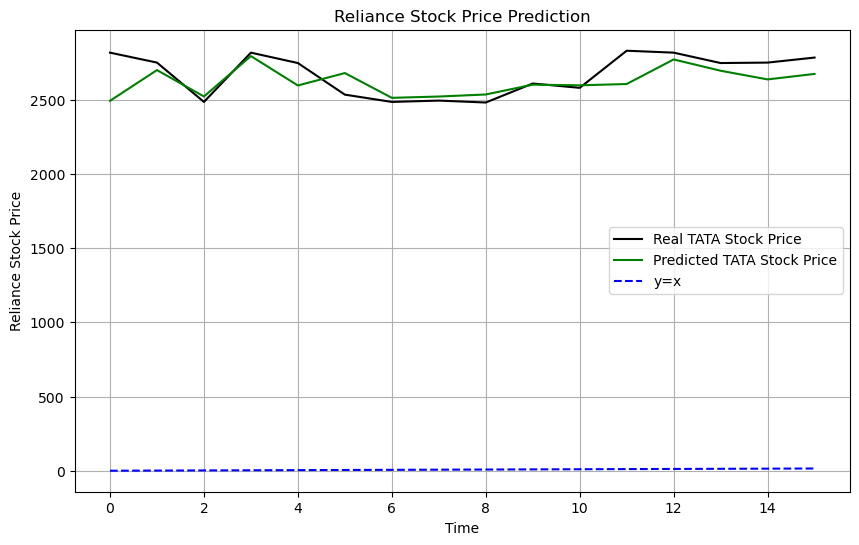

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
real_stock_price = np.array([
    [2817.00],
    [2750.00],
    [2485.00],
    [2817.00],
    [2747.00],
    [2534.05],
    [2485.00],
    [2494.00],
    [2481.00],
    [2609.00],
    [2580.00],
    [2830.00],
    [2817.00],
    [2747.00],
    [2750.00],
    [2783.90]
])

predicted_stock_price = np.array([
    [2492.3755],
    [2699.4668],
    [2521.7568],
    [2793.965],
    [2595.848],
    [2679.5178],
    [2512.6099],
    [2521.2705],
    [2535.1655],
    [2601.2183],
    [2596.8745],
    [2605.6772],
    [2771.1406],
    [2695.1672],
    [2636.7297],
    [2673.6804]
])

# Convert strings to float
real_stock_price = real_stock_price.astype(float)
predicted_stock_price = predicted_stock_price.astype(float)



# Plotting
plt.figure(figsize=(10, 6))

plt.plot(real_stock_price, color='black', label='Real TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.plot(np.arange(len(real_stock_price)), np.arange(len(real_stock_price)), color='blue', linestyle='--', label='y=x')

plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()

plt.grid(True)
plt.show()


In [26]:
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(real_stock_price - predicted_stock_price))
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 88.17351874999997
Mean Absolute Percentage Error (MAPE): 3.24%
